## Cleaning and Preparing data for model training

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [2]:
df_train = pd.read_csv('train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df_test = pd.read_csv('test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [4]:
df = df_train.append(df_test)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [6]:
df.drop(['User_ID'],axis = 1, inplace = True)

In [7]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [8]:
# Handling the categorical feature gender
df['Gender'] = df['Gender'].map({'F':0,'M':1})

handling categorical feature age

In [9]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [10]:
df['Age'] = df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [11]:
## Working on City categorical variable
df_city = pd.get_dummies(df['City_Category'],drop_first=True)

In [12]:
df = pd.concat([df,df_city],axis = 1)

In [13]:
df.drop(['City_Category'],axis = 1, inplace = True)

Handling Missing Values

In [14]:
df.isna().sum()/df.shape[0]

Product_ID                    0.000000
Gender                        0.000000
Age                           0.000000
Occupation                    0.000000
Stay_In_Current_City_Years    0.000000
Marital_Status                0.000000
Product_Category_1            0.000000
Product_Category_2            0.313886
Product_Category_3            0.696481
Purchase                      0.298085
B                             0.000000
C                             0.000000
dtype: float64

In [15]:
# Handling Product_category_2 
df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [16]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [17]:
df['Product_Category_2'].isna().sum()

0

As Product category 3 has almost 70% missing values but we will try to fill it with mode

In [18]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [19]:
df['Product_Category_3'].isna().sum()

0

Work on Stay_In_Current_City_Years Column

In [20]:
# As years are numerical and ordinal mapping can be done for them
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','')

<ipython-input-20-614d892b8718>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','')


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int64(5), object(2), uint8(2)
memory usage: 67.3+ MB


In [22]:
df = df.astype({'Stay_In_Current_City_Years':int,'B':int,'C':int})

In [23]:
#sns.pairplot(df)

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

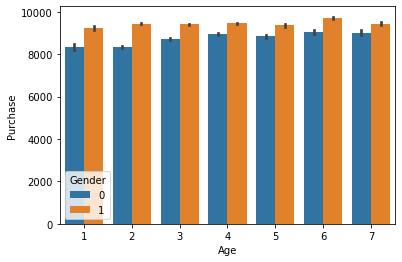

In [24]:
# Visualization of age and purchase
sns.barplot(x = 'Age',y = 'Purchase',hue='Gender',data=df)

Females usually buys less than males in every age group.
For each age group purchases are uniform

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

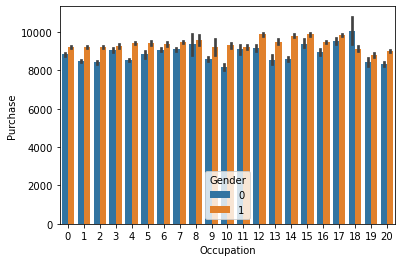

In [25]:
# Visualization of occupation and purchase
sns.barplot(x = 'Occupation',y = 'Purchase',hue='Gender',data=df)

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

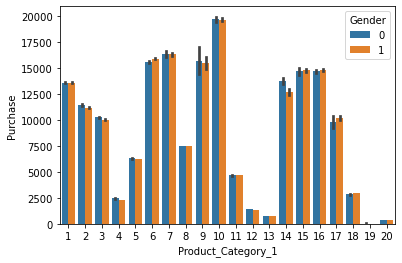

In [26]:
# Visualization of product_category 1 and purchase
sns.barplot(x = 'Product_Category_1',y = 'Purchase',hue='Gender',data=df)

<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

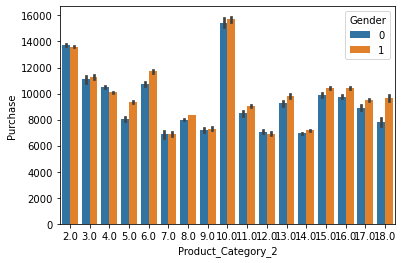

In [27]:
sns.barplot(x = 'Product_Category_2',y = 'Purchase',hue='Gender',data=df)

In [28]:
df.drop(['Product_ID'],axis = 1,inplace = True)

In [29]:
df_test = df[df['Purchase'].isna()]

In [30]:
df_test.drop(['Purchase'],axis = 1,inplace = True)

C:\Users\PULKIT\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [31]:
df_train = df[~df['Purchase'].isnull()]

In [32]:
df_train.columns = ['Gender', 'Age', 'Occupation', 'Stay_In_Current_City_Years',
       'Marital_Status', 'Product_Category_1', 'Product_Category_2',
       'Product_Category_3', 'B', 'C', 'Purchase']

In [33]:
X = df_train.iloc[:,:-1]
y = df_train.iloc[:,-1]

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [36]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Making Prediction using Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lg = LinearRegression()
lg.fit(X_train,y_train)
lg_pred = lg.predict(X_test)

print('Using Linear Regression')
print(f'Mean Squared Error : {round(mean_squared_error(y_test,lg_pred),4)}')
print(f'r2 Score : {round(r2_score(y_test,lg_pred),4)}')

LinearRegression()

In [49]:
from sklearn.linear_model import Lasso

lso = Lasso()
lso.fit(X_train,y_train)
lso_pred = lso.predict(X_test)

print('Using Lasso Regression')
print(f'Mean Squared Error : {round(mean_squared_error(y_test,lso_pred),4)}')
print(f'r2 Score : {round(r2_score(y_test,lso_pred),4)}')

Using Lasso Regression
Mean Squared Error : 0.214
r2 Score : -0.0


In [48]:
from sklearn.linear_model import Ridge

rdg = Ridge()
rdg.fit(X_train,y_train)
rdg_pred = rdg.predict(X_test)

print('Using Ridge Regression')
print(f'Mean Squared Error : {round(mean_squared_error(y_test,rdg_pred),4)}')
print(f'r2 Score : {round(r2_score(y_test,rdg_pred),4)}')


Using Ridge Regression
Mean Squared Error : 0.141
r2 Score : 0.3413


In [44]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
rfr_pred = rfr.predict(X_test)

print(f'Mean Squared Error : {round(mean_squared_error(y_test,rfr_pred),4)}')
print(f'r2 Score : {round(r2_score(y_test,rfr_pred),4)}')

Mean Squared Error : 0.0885
r2 Score : 0.5865


Hypertuning the models

In [74]:
from sklearn.model_selection import GridSearchCV

lasso_para = {'alpha':[0.01,0.1,1,10,5,100,50,1000,500]}
ridge_para = {'alpha':[0.01,0.1,1,10,5,100,50,1000,500]}
ran_forest_para = {'n_estimators':[10,100,1000],'max_depth':[50,100,200,500]}

In [ ]:
# For checking valid scoring keys in sk_learn gridsearch 
import sklearn
sklearn.metrics.SCORERS.keys()

Lasso Grid Search

In [70]:
ls_grid = GridSearchCV(estimator= lso, param_grid=lasso_para, scoring='r2', cv = 10,verbose=1)
ls_grid.fit(X_train,y_train)
print(f'Best Parameter : {ls_grid.best_params_}, \n Best Score : {ls_grid.best_score_}')

Fitting 10 folds for each of 9 candidates, totalling 90 fits
Best Parameter : {'alpha': 0.01}, 
 Best Score : 0.3382856009854205


Ridge Grid Search

In [73]:
rdg_grid = GridSearchCV(estimator= rdg, param_grid=ridge_para, scoring='r2', cv = 10,verbose=1)
rdg_grid.fit(X_train,y_train)
print(f'Best Parameter : {rdg_grid.best_params_}, \n Best Score : {rdg_grid.best_score_}')

Fitting 10 folds for each of 9 candidates, totalling 90 fits
Best Parameter : {'alpha': 10}, 
 Best Score : 0.34049803576480697


Random Forest Gridsearch

In [76]:
rfr_grid = GridSearchCV(estimator= rfr, param_grid=ran_forest_para, scoring='r2', cv = 10,verbose=2)
rfr_grid.fit(X_train,y_train)
print(f'Best Parameter : {rfr_grid.best_params_}, \n Best Score : {rfr_grid.best_score_}')

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV] END ......................max_depth=50, n_estimators=10; total time=   7.0s
[CV] END ......................max_depth=50, n_estimators=10; total time=   7.5s
[CV] END ......................max_depth=50, n_estimators=10; total time=   7.2s
[CV] END ......................max_depth=50, n_estimators=10; total time=   7.1s
[CV] END ......................max_depth=50, n_estimators=10; total time=   7.0s
[CV] END ......................max_depth=50, n_estimators=10; total time=   7.0s
[CV] END ......................max_depth=50, n_estimators=10; total time=   7.1s
[CV] END ......................max_depth=50, n_estimators=10; total time=   7.3s
[CV] END ......................max_depth=50, n_estimators=10; total time=   7.3s
[CV] END ......................max_depth=50, n_estimators=10; total time=   7.2s
[CV] END .....................max_depth=50, n_estimators=100; total time= 1.2min
[CV] END .....................max_depth=50, n_

KeyboardInterrupt: 